# Perceptron for Regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [20]:
filepath = "/Users/rajeshr/Desktop/Assignment1/Group22/Regression/UnivariateData/22.csv"
data = pd.read_csv(file1path, header=None, delimiter=" ")
data

,0,1
0,-2.23650,2.3224
1,2.44450,4.5807
2,1.87200,1.1315
3,5.13380,1.0316
4,2.17310,2.2868
...,...,...
495,6.84860,4.0531
496,-2.63380,2.3772
497,-2.47670,4.4016
498,4.85040,4.0128


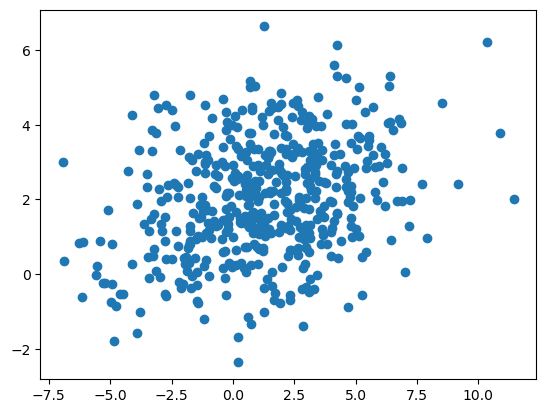

In [89]:
#x = np.arange(len(data.iloc[:,0]))
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

In [10]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [23]:
training, validation, test = split_data(data)

In [63]:
training.iat[1,0]

2.4445

# Training

In [82]:
np.random.seed(0)

def train_data(xn):
    w = np.random.randn(2)
    epoch = 100
    print(w)
    err = []
    avg_err = []
    
    while(epoch):
        for i in range(len(xn)):
            sn = np.dot(w.T, [1, xn.iat[i, 0]])
            yn = xn.iat[i, 1]
            error = 0.5*(yn-sn)**2
            err.append(error)

            neta = 0.2
            dw = neta*(yn-sn)*xn.iat[i, 1]
            w = w+dw

        avg_error = sum(err)/(2*len(err))
        avg_err.append(avg_error)
        epoch -= 1
    
    print(avg_error, w)
    return w
    
w = train_data(training)

[1.76405235 0.40015721]
1807.534028043617 [1.82759087 0.46369574]


# Testing

In [84]:
def test(xn, w):
    
    y = []
    for i in range(len(xn)):
        y.append(np.dot(w.T, [1, xn.iat[i, 0]]))
    
    return y

y = test(validation, w)

In [101]:
px = np.arange(-2, 6)
py = -(w[0]/w[1])*px


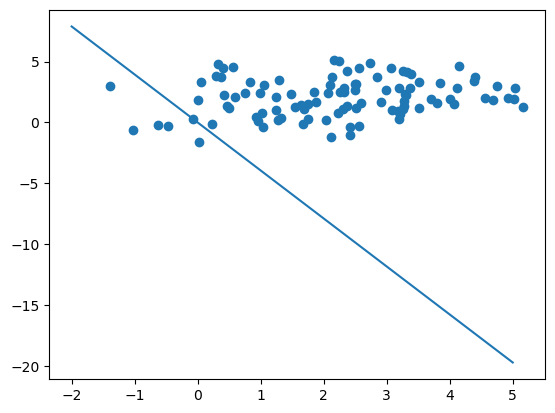

In [103]:
plt.scatter(y, validation.iloc[:,1])
plt.plot(px, py)
plt.show()